<a href = 'http://www.ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'>Dataset Link</a>

## Time-Series 
A variable measured sequentially at fixed intervals of time is called Time-Series Data. These measurements are correlated in time (serial dependence) and this time dimension adds structure to the data. Using Time-Series we can answer a lot of questions. By observing the daily temperatures of New York City we can predict whether it's getting Hotter or Colder. We can forecast the sales of companies or can predict daily stock prices.

### How we are going to use Time-Series. 
A Time-Series is stationary if its statistical properties don't change with time. We will remove or model the part that changes through time to get the stationary Time-Series and use machine learning algorithms to capture the correlation in the stationary series to answer our questions.
<img src="images/1.JPG">
### Components of Time-Series
* <b>Trend:</b>  A long term increase or decrease in the data over a period of time or long term change in mean level.<br>
<img src="images/2.JPG">
* <b>Seasonality</b> Short term patterns in the data that are predictable or variation in mean that is periodic in nature.<br>
<img src="images/3.JPG">
* <b>Cyclicity</b> Variation that oscillates not according to a fixed period.
* <b>Irregularity</b> Random fluctuations that can't be explained.


### Properties of Time Series Data
1) It has one single X-variable.<br>
2) The single X-variable is time specific unit.<br>
3) The data should be Subsequent.<br>
4) All the entries should be of same single unit.<br>
5) There should not be any missing value in data.<br>

### Problem Statement
PowerHorse, a tractor and farm equipment manufacturing company, was established a few years after World War II. The company has shown a consistent growth in its revenue from tractor sales since its inception. However, over the years the company has struggled to keep it’s inventory and production cost down because of variability in sales and tractor demand. The management at PowerHorse is under enormous pressure from the shareholders and board to reduce the production cost.

Develop models to forecast next 3 years sales.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
Tractor_sales = pd.read_csv("Tractor-Sales.csv")

In [59]:
Tractor_sales.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [60]:
Tractor_sales.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [61]:
# Assume that the date was from the starting of the month
dates = pd.date_range(start = '2003-01-01',freq = 'MS',periods = len(Tractor_sales))

In [62]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [63]:
# Renaming the Column for better Understanding
Tractor_sales.rename(columns={"Number of Tractor Sold":"Sales"},inplace=True)

In [64]:
#  Setting index to the dates for the Time-Series Constraint
Tractor_sales.set_index(dates,inplace = True)

In [65]:
# Dropping the Variable as it is insignificant
Tractor_sales.drop(['Month-Year'],axis = 1 ,inplace=True)

In [66]:
Tractor_sales.head()

,Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


### The main concepts of Time-Series starts from here. 

In [67]:
sales = Tractor_sales['Sales']
sales
# here w have extracted the sales data as Series having index of Time Series data.

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Sales, Length: 144, dtype: int64

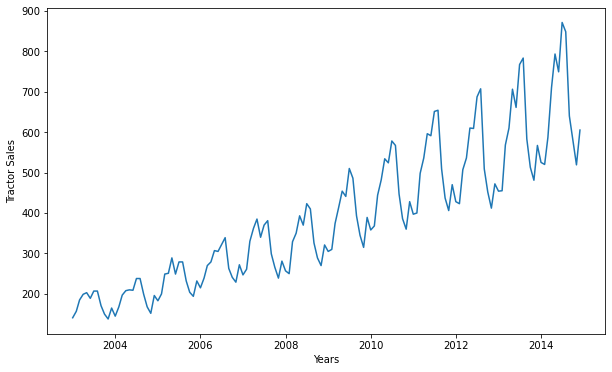

In [68]:
plt.figure(figsize=(10,6))
plt.plot(sales)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
plt.show()

### Exploring the Trend in the data 
It is hard to see trend in the presence of noise or seasonality in the data.So we can use different Techniques:<br>
1) Aggregate (Use annual Data)<br>
2) Smooth (Moving Average)<br>
3) Subtract (Remove Seasonality/Noise)<br>

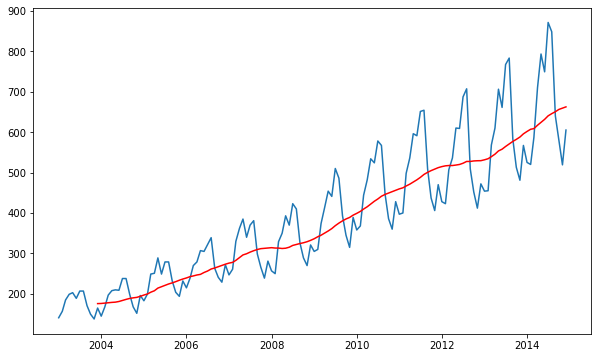

In [69]:
# We can use annual data to get the Trend.
plt.figure(figsize=(10,6))
moving_avg = sales.rolling(12).mean()
plt.plot(sales)
plt.plot(moving_avg, color='red')

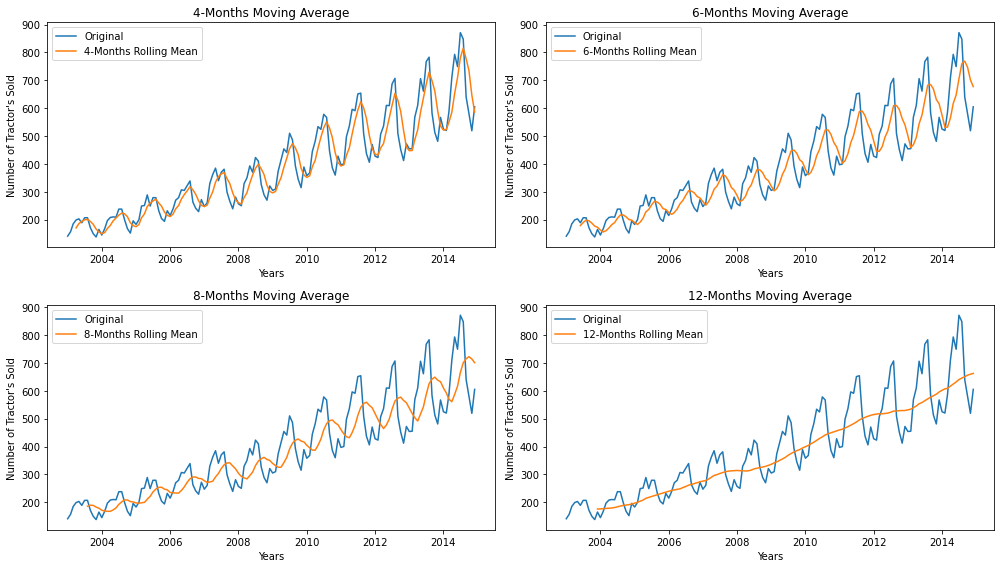

In [70]:
# We can experiment to see best trend line 
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

### Time Series Decomposition, visualizing Seasonality, Trend and Irregularity 

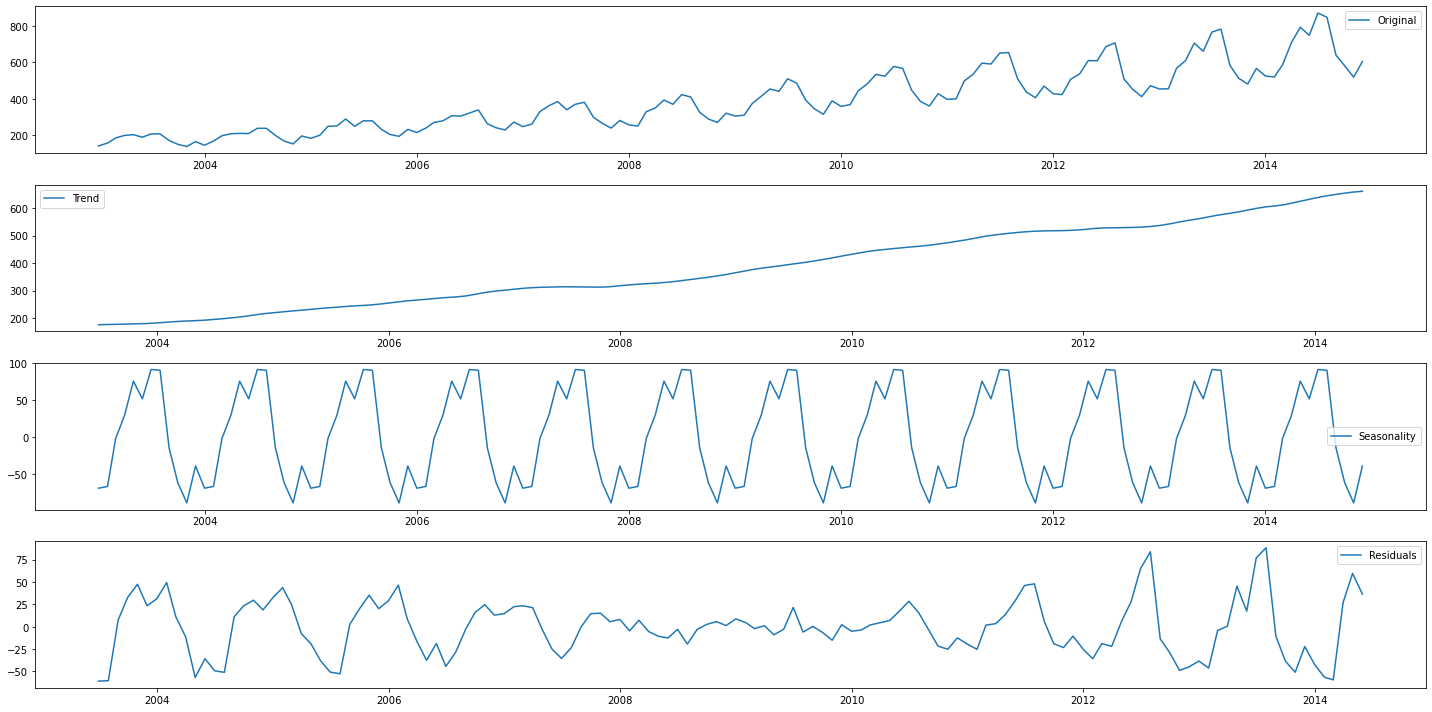

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Examining Residuals 

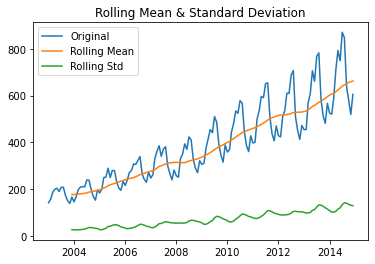

In [72]:
mean = sales.rolling(window=12).mean()
std = sales.rolling(window=12).std()

original = plt.plot(sales, label='Original')
mean = plt.plot(mean, label='Rolling Mean')
std = plt.plot(std, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### <i> From the analysis we can see that our data is not stationary and we will use different approaches to make it stationary.

### Concept of Stationary - ADF Test 
Now that we know to answer our questions we need the data to be stationary i.e. summary statistics are consistent. We will use Augmented Dickey-Fuller Test to check the stationarity of the data. THe test Statistics is a negative number, more negative the number is more stationary the data.

<b>Null Hypothesis:</b> If accepted, it suggests that the time series has a unit root/non stationary. it has some time dependent structure.<br>
<b>Alternate Hypothesis:</b>Time Series does not have any unit root and is stationary.

In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
adfuller(sales)

(1.1088250591467355,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [75]:
# p-value is 0.99 and data is not stationary.

### Making Data Stationary

In [76]:
# By using log transformation
sales_log = np.log10(sales)

In [77]:
# ADF test on log data
adfuller(sales_log)

(-1.7324716814049526,
 0.414464492749114,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -661.9990401272435)

In [78]:
# much improvement in P-value from.99 to .41 

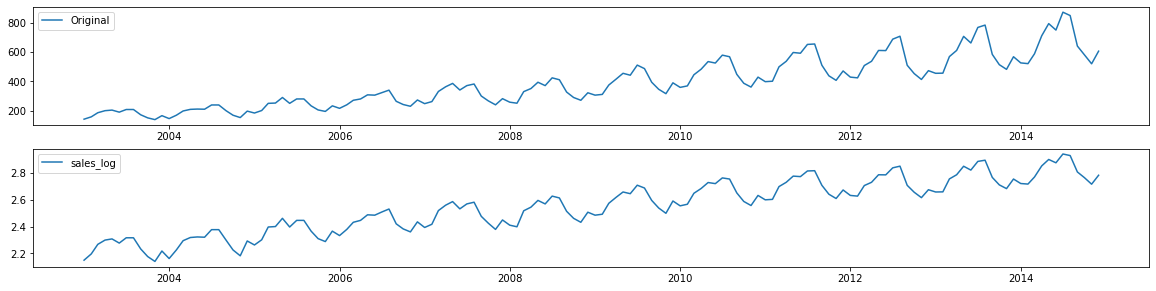

In [79]:
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(sales_log, label='sales_log')
plt.legend(loc='best')

In [80]:
# Applying lag of 2 or diffrencing of 2 on log data
# We choose lag of 2 by experimenting to get the better results i.e. stationarity
sales_log_diff = sales_log.diff(2)
sales_log_diff.dropna(inplace = True)

In [81]:
# ADF test on diff data
adfuller(sales_log_diff)

(-3.200721566232436,
 0.019942950105459347,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -646.7481352381412)

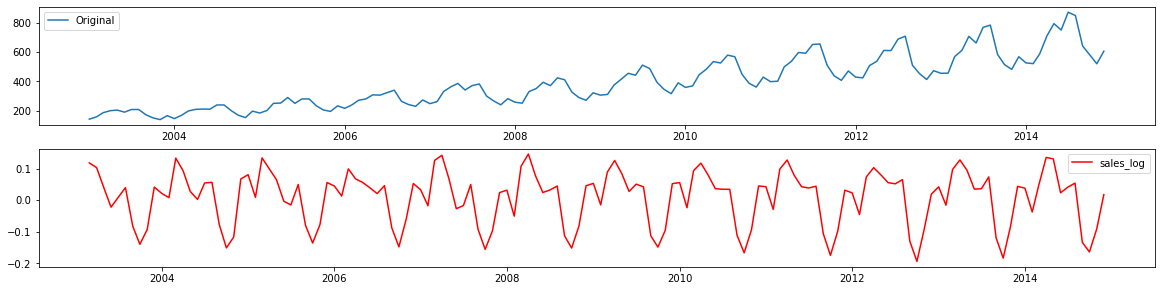

In [82]:
# we can see that our data is now almost stationary
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(sales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(sales_log_diff, label='sales_log',color = 'Red')
plt.legend(loc='best')

####  The trend component is gone and our data is almost stationary.

### ARIMA Model 
After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. There is a systematic way to do this. By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.  ACF plot: it is merely a plot of the coefficients of correlation between a time series and lags of itself. The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

We will find the value of p,d and q and from experiments we have value of d as 2. Now we will find the value of p and q.



In [83]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [84]:
sales_log = np.log10(sales)
sales_log.dropna(inplace=True)

sales_log_diff = sales_log.diff(periods=1)
sales_log_diff.dropna(inplace=True)

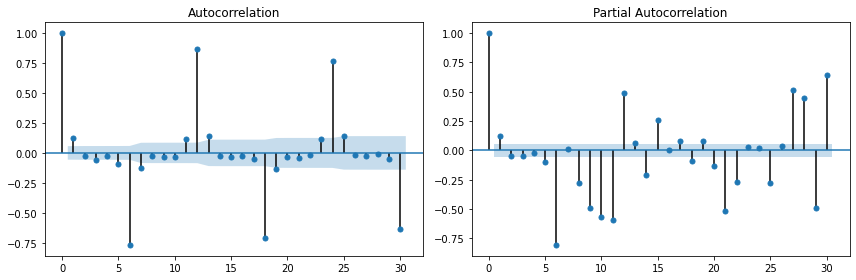

In [85]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

### Best value is to find where the correlation become 0 or less than 0.
### ACF = 1 and PACF = 2

In [86]:
model = sm.tsa.statespace.SARIMAX(sales_log,order = (1,2,2),seasonal_order=(1,0,0,12),
                                 enforce_invertibility=False,
                                 enforce_stationarity= False)

In [87]:
results = model.fit()

In [88]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 2)x(1, 0, [], 12)   Log Likelihood                 328.426
Date:                             Mon, 17 May 2021   AIC                           -646.853
Time:                                     13:51:39   BIC                           -632.554
Sample:                                 01-01-2003   HQIC                          -641.043
                                      - 12-01-2014                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7180      0.183     -3.920      0.000      -1.077      -0.359
ma.L1          1.0782     8

### Find best p,d,q  and P,D,Q 

In [89]:
import itertools
import warnings

In [90]:
p = q = range(0,3)
d = range(2,3)
pdq = list(itertools.product(p, d, q))

In [91]:
pdq

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [92]:
D = range(0,2)
P = Q = range(0,2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [93]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 2, 2)x(1, 0, 1, 12)12 model - AIC:-723.2558728863467


In [94]:
final_model = sm.tsa.statespace.SARIMAX(sales_log,order = (0,2,2),seasonal_order=(1,0,1,12),
                                 enforce_invertibility=False,
                                 enforce_stationarity= False)

In [95]:
results_1 = final_model.fit()

In [96]:
print(results_1.summary().tables[0])
print(results_1.summary().tables[1])

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                  144
Model:             SARIMAX(0, 2, 2)x(1, 0, [1], 12)   Log Likelihood                 339.409
Date:                              Mon, 17 May 2021   AIC                           -668.817
Time:                                      13:53:29   BIC                           -654.596
Sample:                                  01-01-2003   HQIC                          -663.039
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4116     25.047     -0.056      0.955     -50.502      47.679
ma.L2          0.41

In [97]:
predictions = results_1.get_prediction(start = pd.to_datetime('2014-01-01'),full_results = True)

In [98]:
predictions.predicted_mean

2014-01-01    2.721848
2014-02-01    2.722553
2014-03-01    2.810604
2014-04-01    2.816061
2014-05-01    2.893280
2014-06-01    2.880172
2014-07-01    2.933376
2014-08-01    2.942944
2014-09-01    2.807660
2014-10-01    2.748807
2014-11-01    2.724530
2014-12-01    2.788989
Freq: MS, dtype: float64

In [99]:
forecast = np.power(10,predictions.predicted_mean)

In [102]:
actual = sales['2014-01-01':]

In [104]:
MAPE_1 = np.mean(np.abs(actual/forecast)/actual)

In [105]:
MAPE_1

0.0015516498549282083

In [106]:
# forecast for 3 years
np.power(10,results_1.forecast(steps = 36))

2015-01-01     566.851110
2015-02-01     565.448281
2015-03-01     672.335362
2015-04-01     760.964678
2015-05-01     859.792138
2015-06-01     819.979426
2015-07-01     943.466554
2015-08-01     938.831420
2015-09-01     702.422906
2015-10-01     623.802601
2015-11-01     567.879037
2015-12-01     665.670591
2016-01-01     620.766489
2016-02-01     619.053703
2016-03-01     737.065098
2016-04-01     834.968282
2016-05-01     944.229524
2016-06-01     899.874643
2016-07-01    1036.471841
2016-08-01    1031.062328
2016-09-01     769.151922
2016-10-01     682.131454
2016-11-01     620.274729
2016-12-01     727.971868
2017-01-01     678.247164
2017-02-01     676.181170
2017-03-01     806.177134
2017-04-01     914.079093
2017-05-01    1034.602481
2017-06-01     985.303609
2017-07-01    1136.061138
2017-08-01    1129.780772
2017-09-01     840.283098
2017-10-01     744.189438
2017-11-01     675.930891
2017-12-01     794.263623
Freq: MS, dtype: float64

In [107]:
n_steps = 36
pred_uc_99 = results_1.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results_1.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [109]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,566.851110,526.974549,609.745162,526.974549,609.745162
2015-01-01,565.448281,519.367978,615.617003,519.367978,615.617003
2015-02-01,672.335362,610.943284,739.896568,610.943284,739.896568
2015-03-01,760.964678,684.713213,845.707708,684.713213,845.707708
2015-04-01,859.792138,766.587055,964.329512,766.587055,964.329512


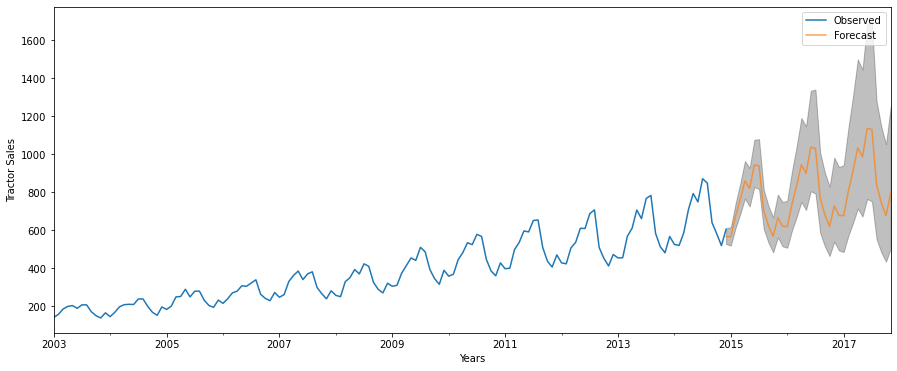

In [111]:
# plot the forecast along with the confidence band
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

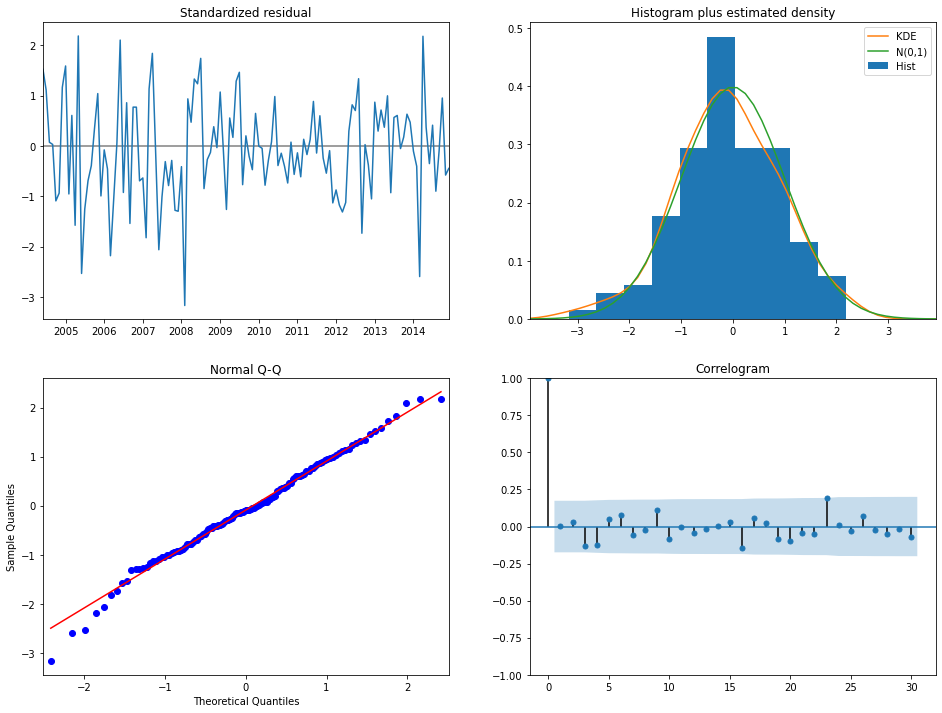

In [112]:
results_1.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

#### How to look at these graphs
The residuals should be on line. the correlation should be high and the histogram should be normal. First chart is resdiual 